## Midi Embedding + Initial Genre Analysis

This notebook will load the MIDI embeddings from the MidiLakh dataset and perform analysis on the structure of the latent representations.

### Imports and Dataset loading

In [80]:
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors

import sklearn.decomposition  as dec
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import scipy
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

import random

data_path = '../data/'

In [4]:
df = pd.read_csv(data_path + "lakh.csv")
df_metadata = pd.read_csv(data_path + "lakh_all_songs_processed.csv")

In [6]:
emb = KeyedVectors.load_word2vec_format(data_path + 'lmd.bin')

In [7]:
ids = [i for i in df.id.tolist() if i in emb]
data = np.array([emb[i] for i in ids])

#### Metadata file

In [8]:
df_metadata

,id,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,...,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id,idx_artist_mbtags,year,Unnamed: 54
0,0,TRAAAGR128F425B14B,NaN,11319,0.712886,0.559257,ARGE7G11187FB37E05,NaN,"Brooklyn, NY",NaN,...,-7.322,0,0.495,240.640,123.989,4,0.800,TRAAAGR128F425B14B,0,2008
1,1,TRAAAZF12903CCCF6B,NaN,93189,0.546102,0.383787,ARJJ8611187FB5321F,40.79086,"New York, NY [Manhattan]",-73.96644,...,-11.137,1,0.442,167.607,110.129,4,0.711,TRAAAZF12903CCCF6B,0,1983
2,2,TRAABVM128F92CA9DC,NaN,1396,0.707200,0.513463,ARYKCQI1187FB3B18F,NaN,NaN,NaN,...,-5.271,1,0.756,285.605,150.062,4,0.931,TRAABVM128F92CA9DC,0,2004
3,3,TRAABXH128F42955D6,NaN,611,0.635346,0.463478,ARD9UVF1187B9B17FE,NaN,"Hawthorne, CA",NaN,...,-7.108,1,0.514,160.717,100.494,3,1.000,TRAABXH128F42955D6,0,1998
4,4,TRAACQE12903CC706C,NaN,153505,0.583006,0.333922,ARDDIBO1187B9B0822,NaN,NaN,NaN,...,-5.033,1,0.453,156.973,118.430,4,0.610,TRAACQE12903CC706C,0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31029,31029,TRZZYLO12903CAC06C,NaN,382471,0.445457,0.287668,AR0Q5531187FB45143,NaN,NaN,NaN,...,-14.526,1,0.677,258.507,133.108,3,0.381,TRZZYLO12903CAC06C,0,0
31030,31030,TRZZYTX128F92EBE33,NaN,32056,0.739047,0.541603,ARW9QSZ1187FB4B93E,NaN,"Liverpool, England",NaN,...,-8.593,1,0.652,164.548,122.832,4,0.090,TRZZYTX128F92EBE33,0,0
31031,31031,TRZZZBU128F426811B,NaN,70032,0.490194,0.377473,ARYN8YT1187FB38396,NaN,NaN,NaN,...,-7.935,1,0.481,191.002,171.826,4,0.978,TRZZZBU128F426811B,0,0
31032,31032,TRZZZTN128EF35C42F,NaN,65225,0.327659,0.184442,ARHND4H1187B990171,NaN,NaN,NaN,...,-5.997,0,0.511,465.119,170.928,5,1.000,TRZZZTN128EF35C42F,0,0


#### Embedding file

In [9]:
# Let's look at the first embedding.

emb['TRAAAGR128F425B14B']

array([-1.8443432e-01,  6.4225338e-02,  2.2557946e-01,  2.3294510e-01,
       -4.8060566e-03, -2.4110529e-01, -9.8117307e-02,  1.9202682e-01,
        9.3585521e-02,  1.5604047e-01, -1.2695704e-01, -3.4721681e-01,
        1.7937580e-01,  6.3882601e-01, -2.7144471e-01,  3.8048795e-01,
        8.8833041e-02,  7.7679120e-02,  4.1888651e-02, -8.9360720e-01,
        2.1103244e-01, -2.6712686e-01, -2.6881331e-01,  4.8260829e-01,
       -3.7794399e-01,  3.0959979e-01,  7.2386764e-02, -1.1859800e-01,
       -5.6240689e-02, -9.2752993e-02, -7.8732587e-02, -1.9664824e-01,
        7.2627582e-02,  3.5716689e-01,  1.9424279e-01,  4.8798272e-01,
       -6.9760847e-01, -6.3095197e-02, -2.0825563e-02, -5.0930041e-01,
        4.8014611e-01, -2.6110387e-01, -5.9381362e-02,  2.5094286e-01,
        4.9810946e-01, -3.8085658e-02,  5.2954251e-01, -1.7717047e-01,
        4.8932469e-01,  4.3615788e-01, -4.6164274e-01,  1.2686481e-03,
        3.1576183e-02,  9.0506889e-02, -7.6077268e-02, -8.5308088e-04,
      

#### Tags for songs

In [10]:
# What genres are available to analyze? 

set(df.tag_echo)

{'2 tone',
 '8-bit',
 '80s country',
 'acid jazz',
 'acoustic',
 'adult contemporary',
 'africa',
 'afrobeat',
 'all-female',
 'alternative',
 'alternative country',
 'alternative dance',
 'alternative hip hop',
 'alternative metal',
 'alternative pop',
 'alternative rock',
 'americana',
 'arabesque',
 'art rock',
 'avantgarde metal',
 'bachata',
 'baile funk',
 'ballad',
 'ballet',
 'banda',
 'baroque music',
 'bass',
 'bass music',
 'batucada',
 'beat',
 'beatboxing',
 'bebop',
 'bel canto',
 'belgium',
 'bhangra',
 'big beat',
 'black metal',
 'blackened death metal',
 'blue-eyed soul',
 'bluegrass',
 'blues',
 'blues-rock',
 'bolero',
 'boogaloo',
 'bossa nova',
 'boy band',
 'brass band',
 'brazilian jazz',
 'brazilian pop music',
 'breakbeat',
 'breakcore',
 'brill building pop',
 'british blues',
 'british invasion',
 'british pop',
 'broken beat',
 'brutal death metal',
 'bubblegum dance',
 'bubblegum pop',
 'buddamat',
 'bulerias',
 'cabaret',
 'california',
 'calypso',
 'cant

In [11]:
# How many unique genres are there?

len(set(df.tag_echo))

505

### Mapping labels to embeddings

In [12]:
dict_ids = {}
for k in set(df.tag_echo): 
    dict_ids[k] = df.loc[df.tag_echo == k, "id"].values

In [13]:
acc_matrix = []
acc_label = []
counter = 0

for label, ids in dict_ids.items():
    for id_ in ids: 
        try:
            emb[id_]
            acc_matrix.append(emb[id_])
            acc_label.append(label)
        except:
            counter += 1
print("Mistakes:", counter)
matrix = np.stack(acc_matrix)
labels = np.array(acc_label)

Mistakes: 58


### PCA analysis 

Let's map the embeddings down to 2 dimensions using PCA, so we can visualize them.

In [35]:
model = dec.PCA(2)
matrix_red = model.fit_transform(matrix)

#### Plotting centroids of 50 most common genres

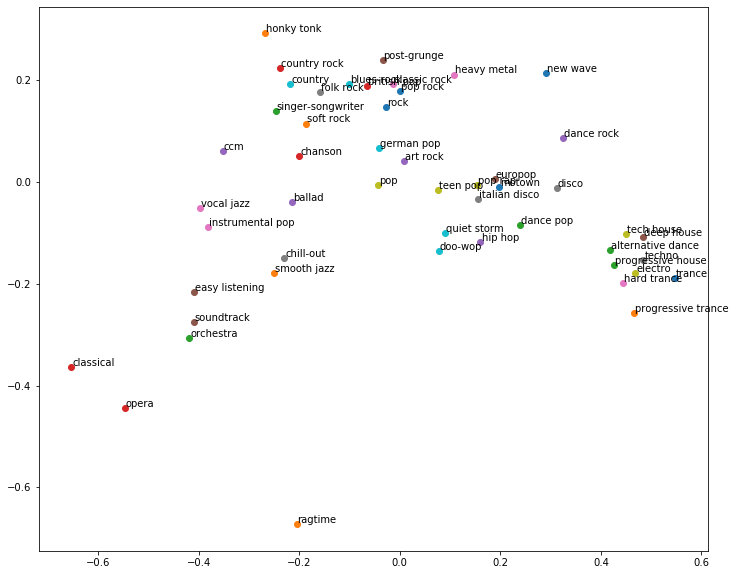

In [48]:
fig, axs = plt.subplots(1, 1, figsize=(12,10))
most_common = Counter(labels).most_common(50)

for k, _ in most_common:
    x = matrix_red[labels == k, 0].mean()
    y = matrix_red[labels == k, 1].mean()
    axs.scatter(x, y, label=k)
    axs.text(x + 0.002, y + 0.002, s=k, ha="left")
    
plt.show()

### Plotting all songs from genres

Now, let's look at a case study of some interesting genres. Notably, we see trance (far right), rock (top middle) and opera (far left) are quite far from each other on the centroid graph.

We want to individually plot the songs in our dataset to identify the relationships between these genres.

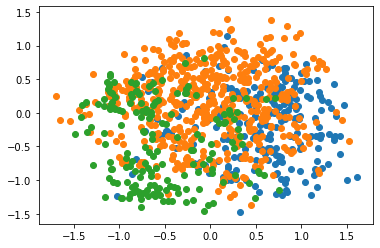

In [49]:
plt.scatter(matrix_red[labels == "trance", 0], matrix_red[labels == "trance", 1])
plt.scatter(matrix_red[labels == "rock", 0], matrix_red[labels == "rock", 1])
plt.scatter(matrix_red[labels == "opera", 0], matrix_red[labels == "opera", 1])

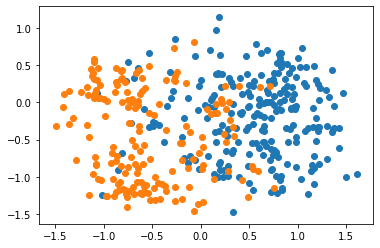

In [50]:
plt.scatter(matrix_red[labels == "trance", 0], matrix_red[labels == "trance", 1])
plt.scatter(matrix_red[labels == "opera", 0], matrix_red[labels == "opera", 1])

# Distances between genres

To examine the relationships between any two genres of our choice, we propose the following strategies.

1. Plotting the distance between 2 selected genres through PCA
2. Cosine similarity between the average vector for the points in a genre

The reason we use average vectors for Cosine Similarity is because the number of songs for each genre differ. To address this problem, we then look at a sample of 100 songs from each genre, and compute distance between the distributions using the Wasserstein metric.

3. Wasserstein distance between the music vectors

In [90]:
# Select the genres
genres_50 = dict(most_common).keys()

genre_1 = widgets.Dropdown(
    options=genres_50,
    value='hip hop',
    description='Genre 1:',
    disabled=True
)

genre_2 = widgets.Dropdown(
    options=genres_50,
    value='country',
    description='Genre 2:',
    disabled=True
)

# temporary workaround
genre_1 = 'hip hop'
genre_2 = 'country'

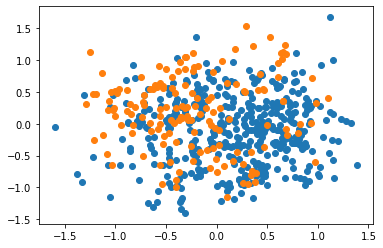

In [55]:
# Plot the genres
plt.scatter(matrix_red[labels == genre_1, 0], matrix_red[labels == genre_1, 1])
plt.scatter(matrix_red[labels == genre_2, 0], matrix_red[labels == genre_2, 1])

In [72]:
avg_genre_1 = np.mean(matrix[labels == genre_1], axis=0)
avg_genre_2 = np.mean(matrix[labels == genre_2], axis=0)

np.round(scipy.spatial.distance.cosine(avg_genre_1, avg_genre_2), 4)

0.0586

In [85]:
# Representative sample of 100 points
genre_1_sample = np.array(random.sample(list(matrix[labels == genre_1]), 100)).reshape(-1)
genre_2_sample = np.array(random.sample(list(matrix[labels == genre_2]), 100)).reshape(-1)

np.round(scipy.stats.wasserstein_distance(genre_1_sample, genre_2_sample), 4)

0.0103

## Genre Analysis

Looking at one specific genre, how can we identify which genres are closest and which are furthest away?

We use our sample of 50 most common genres (with over 100 songs each) for fair comparisons with known song genres.

In [87]:
genre = widgets.Dropdown(
    options=dict(most_common).keys(),
    value='hip hop',
    description='Genre:',
    disabled=True
)

# Workaround
genre = 'hip hop'

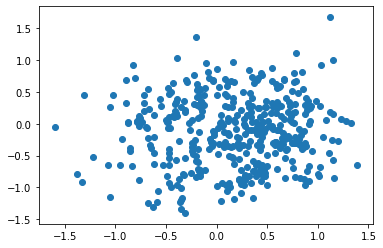

In [88]:
plt.scatter(matrix_red[labels == genre, 0], matrix_red[labels == genre, 1])

In [95]:
# Identify genres in the top 50 that are most similar

def cosine_distance(g1, g2):
    avg_genre_1 = np.mean(matrix[labels == g1], axis=0)
    avg_genre_2 = np.mean(matrix[labels == g2], axis=0)
    return np.round(scipy.spatial.distance.cosine(avg_genre_1, avg_genre_2), 4)

distances = []
for g in genres_50:
    distances.append(cosine_distance(genre, g))

K = 6
res = sorted(range(len(distances)), key = lambda sub: distances[sub])[:K]
print('Most similar genres to ' + genre + ': ')
for i in res[1:]:
    print(list(genres_50)[i])

Most similar genres to hip hop: 
pop rap
dance pop
teen pop
italian disco
europop


In [97]:
# Identify genres in the top 50 that are most different

K = 6
res = sorted(range(len(distances)), key = lambda sub: 1-distances[sub])[:K]
print('Most different genres to ' + genre + ': ')
for i in res[1:]:
    print(list(genres_50)[i])

Most different genres to hip hop: 
classical
orchestra
opera
honky tonk
heavy metal
